In [1]:
!unzip "/content/drive/MyDrive/skin cancer MNIST.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import shutil

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [3]:
input = "/content"
os.listdir(input)

['.config',
 'HAM10000_images_part_2',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'ham10000_images_part_2',
 'hmnist_8_8_L.csv',
 'drive',
 'ham10000_images_part_1',
 'HAM10000_metadata.csv',
 'HAM10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'sample_data']

## Creating Dataset

In [4]:
os.mkdir("base_dir")

In [5]:
base_dir = "/content/base_dir"

In [6]:
# training directory 
train_dir = os.path.join(base_dir, "train_dir")
try:
  os.mkdir(train_dir)
except FileExistsError:
  print(f"{train_dir} Already Exists")

# validation directory 
val_dir = os.path.join(base_dir, "val_dir")
try: 
  os.mkdir(val_dir)
except FileExistsError:
  print(f"{val_dir} Already Exists")

In [7]:
# creating new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
try:
  os.mkdir(nv)
except FileExistsError:
  print(f"{nv} Already Exists")

mel = os.path.join(train_dir, 'mel')
try:
  os.mkdir(mel)
except FileExistsError:
  print(f"{mel} Already Exists")

bkl = os.path.join(train_dir, 'bkl')
try:
  os.mkdir(bkl)
except FileExistsError:
  print(f"{bkl} Already Exists")

bcc = os.path.join(train_dir, 'bcc')
try:
  os.mkdir(bcc)
except FileExistsError:
  print(f"{bcc} Already Exists")

akiec = os.path.join(train_dir, 'akiec')
try:
  os.mkdir(akiec)
except FileExistsError:
  print(f"{akiec} Already Exists")

vasc = os.path.join(train_dir, 'vasc')
try:
  os.mkdir(vasc)
except FileExistsError:
  print(f"{vasc} Already Exists")

df = os.path.join(train_dir, 'df')
try:
  os.mkdir(df)
except FileExistsError:
  print(f"{df} Already Exists")

In [8]:
# creating new folders inside train_dir
nv = os.path.join(val_dir, 'nv')
try:
  os.mkdir(nv)
except FileExistsError:
  print(f"{nv} Already Exists")

mel = os.path.join(val_dir, 'mel')
try:
  os.mkdir(mel)
except FileExistsError:
  print(f"{mel} Already Exists")

bkl = os.path.join(val_dir, 'bkl')
try:
  os.mkdir(bkl)
except FileExistsError:
  print(f"{bkl} Already Exists")

bcc = os.path.join(val_dir, 'bcc')
try:
  os.mkdir(bcc)
except FileExistsError:
  print(f"{bcc} Already Exists")

akiec = os.path.join(val_dir, 'akiec')
try:
  os.mkdir(akiec)
except FileExistsError:
  print(f"{akiec} Already Exists")

vasc = os.path.join(val_dir, 'vasc')
try:
  os.mkdir(vasc)
except FileExistsError:
  print(f"{vasc} Already Exists")

df = os.path.join(val_dir, 'df')
try:
  os.mkdir(df)
except FileExistsError:
  print(f"{df} Already Exists")

In [10]:
cancer_label = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [11]:
cancer_keys = []
for i in cancer_label.keys():
  cancer_keys.append(i)

cancer_values = []
for j in cancer_label.values():
  cancer_values.append(j)

In [12]:
metadata_df = pd.read_csv(os.path.join(input, "HAM10000_metadata.csv"))
metadata_df['dx'] = metadata_df['dx'].map(cancer_label.get)
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,Actinic keratoses,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,Actinic keratoses,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,Actinic keratoses,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,Actinic keratoses,histo,80.0,male,face


In [13]:
metadata_df["dx_type"].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

Text(0.5, 1.02, 'Count of People Who Received Tips by Gender')

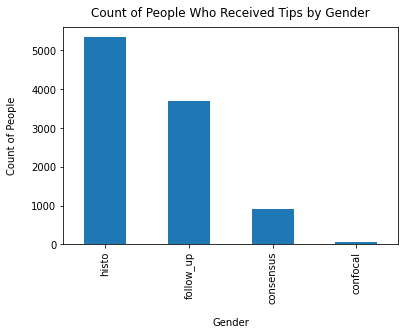

In [14]:
metadata_df["dx_type"].value_counts().plot(kind = "bar")
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02)

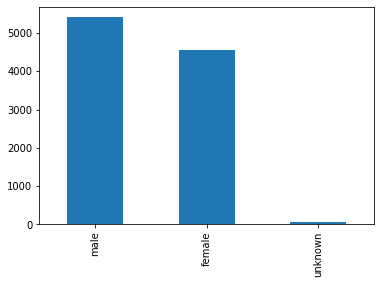

In [15]:
metadata_df["sex"].value_counts().plot(kind = "bar")

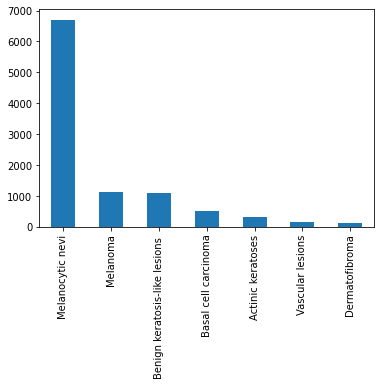

In [16]:
metadata_df["dx"].value_counts().plot(kind = "bar")

In [17]:
df_id = metadata_df.groupby("lesion_id").count()
df_id

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000000,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1
...,...,...,...,...,...,...
HAM_0007624,1,1,1,1,1,1
HAM_0007625,2,2,2,2,2,2
HAM_0007626,1,1,1,1,1,1


In [18]:
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear


In [20]:
df = metadata_df["dx"].value_counts().rename_axis('cancer_type').reset_index(name='counts')
print(df)

                      cancer_type  counts
0                Melanocytic nevi    6705
1                        Melanoma    1113
2  Benign keratosis-like lesions     1099
3            Basal cell carcinoma     514
4               Actinic keratoses     327
5                Vascular lesions     142
6                  Dermatofibroma     115


In [21]:
df["Percentage"] = (df["counts"] / len(metadata_df) * 100)
df

,cancer_type,counts,Percentage
0,Melanocytic nevi,6705,66.949576
1,Melanoma,1113,11.113330
2,Benign keratosis-like lesions,1099,10.973540
3,Basal cell carcinoma,514,5.132302
4,Actinic keratoses,327,3.265102
5,Vascular lesions,142,1.417873
6,Dermatofibroma,115,1.148278


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

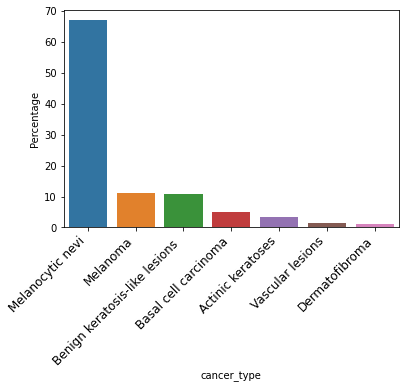

In [22]:
sns.barplot(y = df["Percentage"], x = df["cancer_type"], data = df)
plt.xticks(rotation = 45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [32]:
metadata_df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [24]:
metadata_df["age"].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

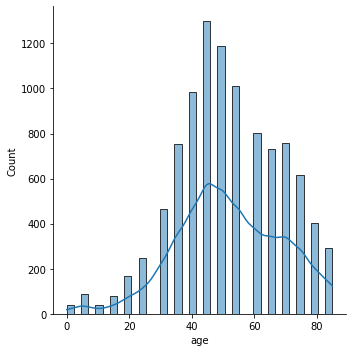

In [26]:
sns.displot(metadata_df["age"], kde = True)

**Justify filling missing values using average by mentioning the distribution follows bell shaped curved stating the average value can be used to replace the missing data.**

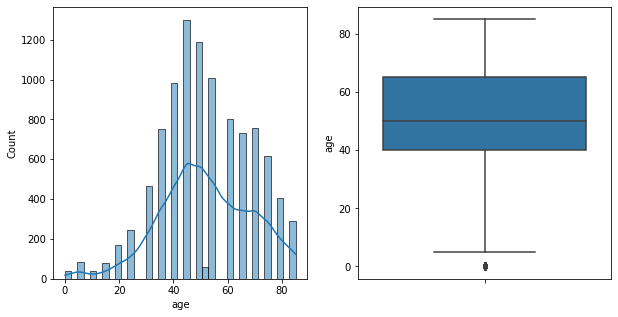

In [30]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(metadata_df["age"], kde = True, ax=axes[0])
sns.boxplot(y=metadata_df["age"], data=metadata_df, ax=axes[1])

fig.show()

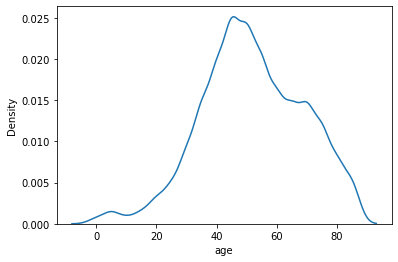

In [31]:
sns.kdeplot(metadata_df["age"])

In [29]:
metadata_df['age'].fillna((metadata_df['age'].mean()), inplace=True)
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,Actinic keratoses,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,Actinic keratoses,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,Actinic keratoses,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,Actinic keratoses,histo,80.0,male,face


## Data Engineering 

In [61]:
input

'/content'

In [63]:
try:
  os.mkdir("consolidated_data")
except FileExistsError: 
  print("Folder Already Exists!")

Folder Already Exists!


In [69]:
src1_dir = "/content/ham10000_images_part_1"
src2_dir = "/content/ham10000_images_part_2"
dst_dir = "/content/consolidated_data"

for images1 in glob(os.path.join(src1_dir, "*.jpg")):
    shutil.copy(images1, dst_dir)

for images2 in glob(os.path.join(src2_dir, "*.jpg")):
  shutil.copy(images2, dst_dir)

In [70]:
len(os.listdir("/content/consolidated_data"))

10015

In [93]:
image_name = []
for i in os.listdir("/content/consolidated_data"):
  fname = os.path.splitext(i)
  image_name.append(fname[0])

In [94]:
image_name

['ISIC_0031861',
 'ISIC_0025077',
 'ISIC_0030598',
 'ISIC_0028074',
 'ISIC_0030708',
 'ISIC_0025932',
 'ISIC_0033948',
 'ISIC_0032561',
 'ISIC_0024786',
 'ISIC_0030069',
 'ISIC_0027138',
 'ISIC_0027390',
 'ISIC_0025585',
 'ISIC_0030434',
 'ISIC_0030185',
 'ISIC_0028244',
 'ISIC_0029195',
 'ISIC_0027214',
 'ISIC_0029445',
 'ISIC_0031360',
 'ISIC_0024452',
 'ISIC_0027808',
 'ISIC_0033955',
 'ISIC_0030874',
 'ISIC_0029731',
 'ISIC_0032378',
 'ISIC_0030834',
 'ISIC_0029565',
 'ISIC_0029338',
 'ISIC_0025763',
 'ISIC_0029914',
 'ISIC_0028580',
 'ISIC_0033056',
 'ISIC_0032172',
 'ISIC_0031611',
 'ISIC_0030321',
 'ISIC_0026837',
 'ISIC_0033347',
 'ISIC_0028231',
 'ISIC_0029238',
 'ISIC_0033694',
 'ISIC_0025804',
 'ISIC_0031869',
 'ISIC_0027910',
 'ISIC_0031248',
 'ISIC_0030980',
 'ISIC_0029009',
 'ISIC_0031238',
 'ISIC_0026614',
 'ISIC_0028641',
 'ISIC_0028601',
 'ISIC_0030718',
 'ISIC_0024443',
 'ISIC_0029681',
 'ISIC_0029525',
 'ISIC_0026757',
 'ISIC_0029117',
 'ISIC_0024848',
 'ISIC_0026545

In [96]:
metadata_df["dx"].unique()

array(['Benign keratosis-like lesions ', 'Melanocytic nevi',
       'Dermatofibroma', 'Melanoma', 'Vascular lesions',
       'Basal cell carcinoma', 'Actinic keratoses'], dtype=object)

In [ ]:
for fname in os.listdir("/content/consolidated_data"):
  fname = os.path.splitext(i)
  image_name.append(fname[0])

In [ ]:
try: 
  os.mkdir("")
except FileExistsError:
  print("Folder Already exists")

clean_data = os.listdir

In [ ]:
# Dump all images into a folder and specify the path:
data_dir = os.getcwd() + "/content/consolidated_data"

# Path to destination directory where we want subfolders
dest_dir = os.getcwd() + "/data/reorganized/"

# Read the csv file containing image names and corresponding labels
skin_df2 = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []


# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]    


In [ ]:
cancer = []
for i in metadata_df["dx"].unique():
  cancer.append(i)

  for j in cancer:
    metadata_df["dx"] == j.value_counts() / len(metadata_df) * 100

In [ ]:
cancer = []
for i in metadata_df["dx"].unique():
  cancer.append(i)

cancer

In [ ]:
for i in cancer:
  metadata_df["dx"] == i
  print(i)

In [ ]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)